<center><h1>Bitcoin</h1></center>
<center>CDASO2020U "Data Mining, Machine Learning and Deep Learning"</center>

<center><h1>Structure</h1></center>

A. [Exploratory data analysis](#A)

B. [Pre-processing](#B)

C. [Supervised Machine Learning](#C)
1. [Data set plit](#1)
2. [Decision Tree](#2)
3. [Random Forest](#3)
4. [Logistic Regression](#4)
5. [SVM](5)
6. [KNN](#6)
7. [Voting Classifier](#7)
7. [Neural Newtworks](#8)


### Used Packages

In [1]:
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Dense
import keras as keras
from keras.layers import Dropout
from keras import regularizers
import lime #conda install -c conda-forge lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from plotly import graph_objs as go  #!conda install --yes --prefix {sys.prefix} plotly (for windows users who's cmd sucks)
from plotly.offline import init_notebook_mode, iplot
import pydotplus
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from time import process_time
import sys

Using TensorFlow backend.
/Users/theresawohlsen/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



# A. Exploratory data analysis <a class="anchor" id="A"></a>

# B. Pre-processing  <a class="anchor" id="B"></a>

In [2]:
# import dataframes and drop index column
df = pd.read_csv('df.csv').drop(['Unnamed: 0'], axis=1)
df_scaled = pd.read_csv('df_scaled.csv').drop(['Unnamed: 0'], axis=1)
df_ransomware = pd.read_csv('df_ransomware.csv').drop(['Unnamed: 0'], axis=1)
df_ransomware_scaled = pd.read_csv('df_ransomware_scaled.csv').drop(['Unnamed: 0'], axis=1)

# C. Supervised Machine Learning  <a class="anchor" id="C"></a>

### 1. Data set split  <a class="anchor" id="1"></a>

In [3]:
# prepare test set for ransomware families detection
def prepare_test_sets(df):
    # select relevant features
    features = ['length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'repeated', 'repeated_counter']
    X = df[features]
    y = df['label']

    #Perform train/test split.
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    
    return xTrain, xTest, yTrain, yTest, features

In [4]:
stop

NameError: name 'stop' is not defined

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
# prepare test set for ransomware detection in general
def prepare_test_sets_all(df):
    # select relevant features
    features = ['length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'repeated', 'repeated_counter' ]
    X = df[features]
    y = df['binary_label']

    #Perform train/test split.
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    
    return xTrain, xTest, yTrain, yTest, features

In [ ]:
xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll = prepare_test_sets_all(df)

### 2. Decision Tree  <a class="anchor" id="2"></a>

In [ ]:
# Function logic for Decision Tree
def get_decision_tree(x1, x2, y1, y2, features):
    class_tree = DecisionTreeClassifier(max_depth = 3)
    class_tree.fit(x1, y1)
    
    yPred_tree = class_tree.predict(x2)
    
    # Metrics
    print("Accuracy Score : ", metrics.accuracy_score(y2, yPred_tree))
    print("Precision Score : ", metrics.precision_score(y2, yPred_tree, average = None))
    print("Recall Score : ", metrics.recall_score(y2, yPred_tree, average = None))
    print("F1 Score : ", metrics.f1_score(y2, yPred_tree, average = None))

    # Confusion Matrix
    print('Confusion Matrix : \n', confusion_matrix(y2, yPred_tree))
    
    # get feature importances
    featureImportances = list(zip(features, class_tree.feature_importances_))
    print(list(sorted(featureImportances, key = lambda k: k[1], reverse = True)))
    
    # visualize tree
    if False:
        dot_data = StringIO()

        export_graphviz(
            reg,
            out_file= dot_data,
            feature_names=features,
            rounded=True,
            filled=True
        )

        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        Image(graph.create_png())
    

####  2.1 Decision Tree for the entire dataset

In [ ]:
get_decision_tree(xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll)

#### 2.2 Decision Tree for ransomware dataset

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
get_decision_tree(xTrain, xTest, yTrain, yTest, features)

### 3. Random Forest <a class="anchor" id="3"></a>

In [ ]:
def get_random_forest(x1, x2, y1, y2, features, gs = True):
    # train the model
    if gs:
        rf = RandomForestClassifier()
    else:
        rf = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = 3,
                                    min_samples_leaf = 3, min_samples_split = 10, n_estimators = 800)
    rf.fit(x1, y1)
    
    yPredRf = rf.predict(x2)
    
    # Metrics
    print("Classfication report : ", metrics.classification_report(y2, yPredRf))
    #print("Accuracy Score : ", metrics.accuracy_score(y2, yPredRf))
    #print("Precision Score : ", metrics.precision_score(y2, yPredRf, average = None))
    #print("Recall Score : ", metrics.recall_score(y2, yPredRf, average = None))
    #print("F1 Score : ", metrics.f1_score(y2, yPredRf, average = None))
    
    # Confusion Matrix
    print("Confusion Matrix : \n", confusion_matrix(y2, yPredRf))
    
    # feature importances
    featureImportances = list(zip(features, rf.feature_importances_))
    print(list(sorted(featureImportances, key = lambda k: k[1], reverse = True)))
    
    # Take a look at some results
    rf_results = pd.DataFrame({'Actual' : y2, 'Predicted' : yPredRf})
    print(rf_results.head(25))

#### 3.1 Random Forest for Entire Dataset

In [ ]:
get_random_forest(xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll)

#### 3.2 Random Forest for Ransomware Dataset (added the hyperparameters that were identified with GS)

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
# Take a look at families of ransomware distribution in order to compare with metrics
df_ransomware_scaled['label'].value_counts()

In [ ]:
get_random_forest(xTrain, xTest, yTrain, yTest, features, gs = False)

<font color = "green">This is the best result we have so far: 0.83, which was obtained by using the hyperparameters identified with Grid Search. 

NOTE: INstead of outputing all the scores individually, I found out you can use - meitrcs.classificatoin_report and its going to show you the whole report on the scores. Also it does some weighted averages for all the classes. 

Read more here: https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1</font>

Also --> When you look at where you have 0.0 and at the value_counts() output from above, you can see that we got bad results for families with few instances. The most populated families actually have better results.


#### REPORT NOTE: It would be more difficult to identify new families of ransomware, because we can see already that less populated classes get bad results. Thus, identification of existing families would only be possible most of the times. In spite of this, we have the binary classification which gives quite good results - meaning that we would be able to use the algorithm just for the detection of ransomware (and not for tha families yet, if its a new one).

### 3.3 Random Forest for Ransomware Dataset with Grid Search

In [ ]:
# Function logif for Random Forest with Grid Search
def get_random_forest_gs(x1, x2, y1, y2, features):
    # train the model
    rf = RandomForestClassifier()
    
    # Parameters for Grid Search
    params = {
        'bootstrap': [True],
        'max_depth': [80, 100],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4],
        'min_samples_split': [8, 10],
        'n_estimators': [100, 800]
    }
    
    grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)
    
    grid_search.fit(x1, y1)
    
    print(grid_search.best_params_)
    print(grid_search.best_score_)

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
get_random_forest_gs(xTrain, xTest, yTrain, yTest, features)

<font color = "red">With the existing list of parameters got the following best score:
'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 800
</font>

### 4. Logistic Regression <a class="anchor" id="4"></a>

In [ ]:
# Function Logic for Logistic Regression

def get_logistic_regression(x1, x2, y1, y2, features, gs = True):
    # Added execution time for the training set
    t1_start = process_time()
    if gs:
        log_regressor = LogisticRegression()
    else:
        log_regressor = LogisticRegression(C = 3, penalty = "l1")
            
    log_regressor.fit(x1, y1)
    t1_stop = process_time()
    print("Total time for the training set:", t1_stop-t1_start)
    
    yPredLog = log_regressor.predict(x2)
    yPredLog
    
    print("Score Report : ", metrics.classification_report(y2, yPredLog))
    
    # Metrics
    print("Accuracy : ", metrics.accuracy_score(y2, yPredLog))
    print("Precision : ", metrics.precision_score(y2, yPredLog, average = None))
    print("Recall : ", metrics.recall_score(y2, yPredLog, average = None))
    
    log_results = pd.DataFrame({'Actual' : y2, 'Predicted' : yPredLog})
    print(log_results.head(25))

#### 4.1 Logistic Regression for Ransomware Dataset

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
get_logistic_regression(xTrain, xTest, yTrain, yTest, features)

<font color = "red">
Before this, I tried to do the logistic regression for the ransomware dataset on the unscaled one - the results were quire poor, and now since we scaled the data I actually see that the results got better, without any parameter tunning.
    
Time : 4.234375
</font>

#### 4.2 Logistic Regression for Ransomware Dataset with PCA

In [ ]:
# Logic Function for Logistic Regression with PCA

def get_logistic_regression_pca(x1, x2, y1, y2, features):
    
    # Initialize PCA
    pca_log = PCA(n_components = 0.95)
    pca_log.fit(x1)
    
    train_pca = pca_log.transform(x1)
    test_pca = pca_log.transform(x2)
    
    # Execution time for the training set with PCA
    t1_start = process_time()
    log_regressor_pca = LogisticRegression().fit(train_pca, y1)
    t1_stop = process_time()
    print("Total time for the training set:",t1_stop-t1_start)
    
    # Check the first results of the prediction
    log_results_pca = pd.DataFrame({'Actual' : y2, 'Predicted' : log_regressor_pca.predict(test_pca)})
    print(log_results_pca.head(25))
    
    print("Score Report : ", metrics.classification_report(y2, log_regressor_pca.predict(test_pca) ))
    #print("Accuracy : ", metrics.accuracy_score(yTest,log_regressor_pca.predict(test_pca)))
    #print("Precision : ", metrics.precision_score(yTest, log_regressor_pca.predict(test_pca), average = None))
    #print("Recall : ", metrics.recall_score(yTest, log_regressor_pca.predict(test_pca), average = None))
    

In [ ]:
get_logistic_regression_pca(xTrain, xTest, yTrain, yTest, features)

<font color = "red"> Much better speed on this ransomware dataset, but since the dataset was reduced with PCA, the results are much worse. And since we have good speed already with Logistic Regression, not much worth it to add PCA to it.

Time : 1.4375
</font>

#### 4.3 Logistic Regression for Ransomware Dataset with Grid Search

In [ ]:
def get_logistic_regression_gs(x1, x2, y1, y2, features):
    # Choose parameters for logistic regression
    params = {"C" : [1, 2, 3], "penalty" : ["l1","l2"]}
    
    log_regressor = LogisticRegression()
    log_regressor_cv = GridSearchCV(log_regressor, params, cv=3)
    log_regressor_cv.fit(x1, y1)
    
    # Get information on best parameters/score
    print("Tuned hyperparameters : ", log_regressor_cv.best_params_)
    print("Best Score : ", log_regressor_cv.best_score_)
    
    log_regressor_tuned = LogisticRegression(C = 3, penalty = "l1")
    log_regressor_tuned.fit(x1, y1)
    log_regressor_tuned.predict(x2)
    print("Score : ", log_regressor_tuned.score(x2, y2))
    
    # Take a look at first results
    log_results = pd.DataFrame({'Actual' : y2, 'Predicted' : log_regressor_tuned.predict(x2)})
    print(log_results.head(25))
    
    print("Score Report : ", metrics.classification_report(y2, log_regressor_tuned.predict(x2)))
    #print("Accuracy : ", metrics.accuracy_score(yTest, log_regressor_tuned.predict(xTest)))
    #print("Precision : ", metrics.precision_score(yTest, log_regressor_tuned.predict(xTest), average = None))
    #print("Recall : ", metrics.recall_score(yTest, log_regressor_tuned.predict(xTest), average = None))

In [ ]:
# Change False to use tunned hyperparameters
get_logistic_regression(xTrain, xTest, yTrain, yTest, features, gs = False)

In [ ]:
get_logistic_regression_gs(xTrain, xTest, yTrain, yTest, features)

<font color = "red">
Tuned hyperparameters :  {'C': 3, 'penalty': 'l1'} - Best Parameters
</font>

<font color = "purple"> Slightly better results with Grid Search, going from 0.67 to 0.69 </font>

#### 4.4 Logistic Regression for Entire Dataset 

In [ ]:
xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll = prepare_test_sets_all(df)

In [ ]:
get_logistic_regression(xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll)

<font color = "purple">TO BE DONE: LR PCA for whole dataset to see the speed </font> 

#### 4.5 Logistic Regression for Entire Dataset with PCA

In [ ]:
xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll = prepare_test_sets(df_scaled)

In [ ]:
get_logistic_regression_pca(xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll)

### 5. SVM <a class="anchor" id="5"></a>

#### 5.1 SVM for Ransomware Dataset

In [ ]:
def getClassifier(ktype):
    if ktype == "Polynomial":
        return SVC(kernel = 'poly', gamma = 'auto')
    elif ktype == "RBF":
        return SVC(kernel = 'rbf', gamma = "auto")
    elif ktype == "Sigmoid":
        return SVC(kernel = 'sigmoid', gamma = "auto")
    elif ktype == "Linear":
        return SVC(kernel = 'linear', gamma = "auto")

In [ ]:
def get_svm(x1, x2, y1, y2, features, kernels):
    for i in kernels:
        svcClf = getClassifier(i)
        svcClf.fit(xTrain, yTrain)
        y_predSvm = svcClf.predict(xTest)
    
        print(str(i))
        print("Accuracy Score : ", metrics.accuracy_score(yTest, y_predSvm))
        #print("Precision Score : ", metrics.precision_score(yTest, y_predSvm, average = None))
        #print("Recall Score : ", metrics.recall_score(yTest, y_predSvm, average = None))
        #print("F1 Score : ", metrics.f1_score(yTest, y_predSvm, average = None))
    
        #Confusion Matrix
        #print("Confusion Matrix : \n", metrics.confusion_matrix(yTest, y_predSvm))
    

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
# Define kernels for SVM
kernels = ['Polynomial', 'Sigmoid', 'Linear']

In [ ]:
if False:
    get_svm(xTrain, xTest, yTrain, yTest, features, kernels)

<font color = "red">This usually gives good results, but don't try to run it always - because it takes too much time to go thru all the kernels. Thats why I even deleted the RBF one, because that was the slowest. </font>

<font color = "purple"> TO DO: PCA FOR SVM with rasnwaomre dataset </font>

#### 5.2 SVM for Ransomware Dataset with PCA

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df)

In [ ]:
# Initialize PCA
pca_svm = PCA(n_components = 0.95)

In [ ]:
train_pca_svm = pca_svm.fit_transform(xTrain)
test_pca_svm = pca_svm.transform(xTest)

In [ ]:
pca_svm.explained_variance_ratio_

In [ ]:
# Call function and feed it PCA features
if False:
    get_svm(train_pcs_svm, test_pca_svm, yTrain, yTest, features, kernels)

### 6. KNN  <a class="anchor" id="6"></a>

#### 6.1  KNN for Entire Dataset

In [ ]:
def get_knn(x1, x2, y1, y2, features):
    clfKnn = KNeighborsClassifier().fit(x1, y1)
    yPredKnn = clfKnn.predict(x2)

    log_results = pd.DataFrame({'Actual' : y2, 'Predicted' : yPredKnn})
    print(log_results.head(25))
    
    #distribution of y test
    print('y actual : \n' +  str(y1.value_counts()))
    #distribution of y predicted
    print('y predicted : \n' + str(pd.Series(yPredKnn).value_counts()))
    
    print("Score Report : ", metrics.classification_report(y2, yPredKnn))

    #print("Accuracy : ", metrics.accuracy_score(y2, yPredKnn))
    #print("Precision : ", metrics.precision_score(y2, yPredKnn))
    #print("Recall : ", metrics.recall_score(y2, yPredKnn))
    #print("F1 Score : ", metrics.f1_score(y2, yPredKnn))

In [ ]:
xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll = prepare_test_sets_all(df)

In [ ]:
get_knn(xTrainAll, xTestAll, yTrainAll, yTestAll, featuresAll)

<font color = "red"> F1 Score for0: 0.99 and for1: 0.23 - so its good at detecting the most popular class out of ransomware or white. </font>

#### 6.2 KNN for Ransomware Dataset with Grid Search

In [ ]:
def get_knn_gs(x1, x2, y1, y2, features):
    clfKnn = KNeighborsClassifier()

    params = { 'n_neighbors': [3,5,7,11,9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    gClf = GridSearchCV(clfKnn, params, cv = 3)

    gClf.fit(x1, y1)
    
    #analyze the best scores
    print(gClf.best_score_, gClf.best_params_)

In [ ]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets(df_ransomware_scaled)

In [ ]:
get_knn_gs(xTrain, xTest, yTrain, yTest, features)

<font color = "red"> Best Results for KNN with GS: 0.7314787984159181 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}</font>

In [ ]:
# Now use the KNN with the best results as seen from Grid Search
newClfKnn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'uniform').fit(xTrain, yTrain)
yPredKnn = newClfKnn.predict(xTest)

log_results = pd.DataFrame({'Actual' : yTest, 'Predicted' : yPredKnn})
log_results.head(25)

In [ ]:
print("Score Report : ", metrics.classification_report(yTest, yPredKnn))

print("Accuracy : ", metrics.accuracy_score(yTest, yPredKnn))
print("Precision : ", metrics.precision_score(yTest, yPredKnn, average = None))
print("Recall : ", metrics.recall_score(yTest, yPredKnn, average = None))
print("F1 Score : ", metrics.f1_score(yTest, yPredKnn, average = None))

<font color ="red">Well, first step was doing simple KNN for the ransomware dataset: the accuracy was around 0.6 each time. And then I implemented the Grid Search with some given parameters, and got close to 0.8 - therefore I took those prarameters from the Grid Search and implemented KNN with them. </font>

### 7. Voting Classifier for ransomware dataset  <a class="anchor" id="7"></a>

In [ ]:
#instantiate the individual algorithms for the ensemble
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11, weights= 'distance')
randomforest = RandomForestClassifier()

#create the ensemble
vc = VotingClassifier(estimators = [('tree', tree), ('knn', knn), ('randomforest', randomforest)], voting = 'soft')

#train the model
vc.fit(xTrain, yTrain)

yPred_Vc = vc.predict(xTest)

print("Report Score : ", metrics.classification_report(yTest, yPred_Vc))

print("Accuracy Score : ", metrics.accuracy_score(yTest, yPred_Vc))
print("Precision Score : ", metrics.precision_score(yTest, yPred_Vc, average = None))
print("Recall Score : ", metrics.recall_score(yTest, yPred_Vc, average = None))
print("F1 Score : ", metrics.f1_score(yTest, yPred_Vc, average = None))
    
#Confusion Matrix
print("Confusion Matrix : \n", metrics.confusion_matrix(yTest, yPred_Vc))

### 8. Neural Networks <a class="anchor" id="8"></a>

In [14]:
df_majority = df_scaled[df_scaled.binary_label==0]
df_minority = df_scaled[df_scaled.binary_label==1]

In [15]:
#We resample the data, since we want the dataset to be balanced to ensure better predictions of ransomware addresses
df_majority_downsampled = resample(df_majority, 
                                replace=False,    
                                 n_samples=23113,     
                                 random_state=32) 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.binary_label.value_counts()

1    41413
0    23113
Name: binary_label, dtype: int64

In [16]:
xTrain, xTest, yTrain, yTest, features = prepare_test_sets_all(df_scaled)

In [17]:
#Since we're interested in having a NN that works well with unseen data, we are going to work with 3 splits
#The three splits are going to be train, validation, and test
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest)

In [18]:
#We create a sequential model, which means that we build the neural network as a sequence, step by step 
nn1 = Sequential([Dense(32, activation='relu', input_shape=(8,)), 
                 Dense(32, activation='relu'), Dense(1, activation='sigmoid')])

In [19]:
#We use stochastic gradient descent as an optimazor
#We use binary crossentropy as a loss function since it works best with a classification problem
nn1.compile('sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
pred1 = nn1.fit(xTrain, yTrain, batch_size=924, epochs=100, validation_data=(xVal, yVal))

Train on 2187516 samples, validate on 546879 samples
Epoch 1/100
2187516/2187516 [==============================] - 21s 9us/step - loss: 0.0935 - accuracy: 0.9861 - val_loss: 0.0648 - val_accuracy: 0.9866
Epoch 2/100
2187516/2187516 [==============================] - 21s 9us/step - loss: 0.0642 - accuracy: 0.9867 - val_loss: 0.0635 - val_accuracy: 0.9868
Epoch 3/100
2187516/2187516 [==============================] - 19s 9us/step - loss: 0.0633 - accuracy: 0.9868 - val_loss: 0.0628 - val_accuracy: 0.9868
Epoch 4/100
2187516/2187516 [==============================] - 20s 9us/step - loss: 0.0627 - accuracy: 0.9868 - val_loss: 0.0623 - val_accuracy: 0.9869
Epoch 5/100
2187516/2187516 [==============================] - 19s 9us/step - loss: 0.0623 - accuracy: 0.9869 - val_loss: 0.0620 - val_accuracy: 0.9869
Epoch 6/100
2187516/2187516 [==============================] - 17s 8us/step - loss: 0.0619 - accuracy: 0.9869 - val_loss: 0.0617 - val_accuracy: 0.9870
Epoch 7/100
2187516/2187516 [======

2187516/2187516 [==============================] - 16s 7us/step - loss: 0.0585 - accuracy: 0.9872 - val_loss: 0.0584 - val_accuracy: 0.9873
Epoch 55/100
2187516/2187516 [==============================] - 16s 7us/step - loss: 0.0585 - accuracy: 0.9872 - val_loss: 0.0584 - val_accuracy: 0.9873
Epoch 56/100
2187516/2187516 [==============================] - 17s 8us/step - loss: 0.0584 - accuracy: 0.9873 - val_loss: 0.0583 - val_accuracy: 0.9873
Epoch 57/100
2187516/2187516 [==============================] - 16s 7us/step - loss: 0.0584 - accuracy: 0.9873 - val_loss: 0.0583 - val_accuracy: 0.9873
Epoch 58/100
2187516/2187516 [==============================] - 16s 7us/step - loss: 0.0584 - accuracy: 0.9873 - val_loss: 0.0583 - val_accuracy: 0.9874
Epoch 59/100
2187516/2187516 [==============================] - 18s 8us/step - loss: 0.0583 - accuracy: 0.9873 - val_loss: 0.0582 - val_accuracy: 0.9873
Epoch 60/100
2187516/2187516 [==============================] - 17s 8us/step - loss: 0.0583 - a

In [21]:
nn1.evaluate(xTest, yTest)[1]

182294/182294 [==============================] - 7s 38us/step


0.9877176284790039

<font color = "purple">  Note: if we try changing the batches we might achieve better results </font>

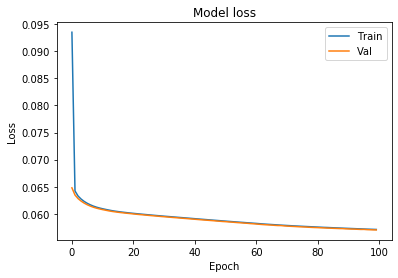

In [22]:
#We want both curves to go downwards, if the orange is increasing it's overfitting.
#We want the organge curve to have a loss function that is as similar to the orange curve as possible.
plt.plot(pred1.history['loss'])
plt.plot(pred1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

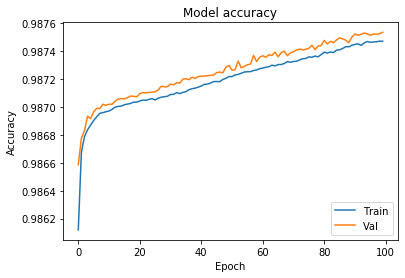

In [23]:
plt.plot(pred1.history['accuracy'])
plt.plot(pred1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
#We make a second model that tries 
nn2 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
    Dropout(0.3),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [25]:
nn2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
pred2 = nn2.fit(xTrain, yTrain, batch_size=924, epochs=100, validation_data=(xVal, yVal))

Train on 2187516 samples, validate on 546879 samples
Epoch 1/100
 538692/2187516 [======>.......................] - ETA: 3:15 - loss: 5.3752 - accuracy: 0.9758

KeyboardInterrupt: 

In [ ]:
nn2.evaluate(xTest, yTest)[1]

In [ ]:
#We want training and validation results to be similar
plt.plot(pred2.history['loss'])
plt.plot(pred2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
#We want the orange line to not stay under the blue line. 
#We improved the model a bit because we can rely on good predictions
plt.plot(pred2.history['accuracy'])
plt.plot(pred2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

<font color = "red"> Conclusion: we can use regularization for ensuring that the model does not overfit. This is achieved with random dropout. </font>